In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
#Cell 2: Load and Normalize the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Normalize the pixel values of the images (0-1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Print shapes of the training and test data
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
#Define the CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [4]:
# Cell 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Adjusted to 'categorical_crossentropy' due to one-hot encoding
              metrics=['accuracy'])

In [5]:
# Cell 5: Train the Model with appropriate batch size and number of epochs
history = model.fit(x_train, y_train_one_hot, batch_size=64, epochs=15, validation_data=(x_test, y_test_one_hot))

Epoch 1/15
782/782 [==============================] - 215s 272ms/step - loss: 1.5688 - accuracy: 0.4253 - val_loss: 1.1795 - val_accuracy: 0.5808
Epoch 2/15
782/782 [==============================] - 203s 259ms/step - loss: 1.1558 - accuracy: 0.5887 - val_loss: 0.9479 - val_accuracy: 0.6742
Epoch 3/15
782/782 [==============================] - 207s 265ms/step - loss: 0.9662 - accuracy: 0.6616 - val_loss: 0.9178 - val_accuracy: 0.6751
Epoch 4/15
782/782 [==============================] - 207s 265ms/step - loss: 0.8533 - accuracy: 0.7022 - val_loss: 0.7905 - val_accuracy: 0.7246
Epoch 5/15
782/782 [==============================] - 207s 265ms/step - loss: 0.7873 - accuracy: 0.7225 - val_loss: 0.7301 - val_accuracy: 0.7468
Epoch 6/15
782/782 [==============================] - 208s 266ms/step - loss: 0.7248 - accuracy: 0.7455 - val_loss: 0.6856 - val_accuracy: 0.7610
Epoch 7/15
782/782 [==============================] - 207s 265ms/step - loss: 0.6873 - accuracy: 0.7598 - val_loss: 0.6906 -

313/313 - 18s - loss: 0.6305 - accuracy: 0.7921 - 18s/epoch - 59ms/step

Test accuracy: 0.7921000123023987


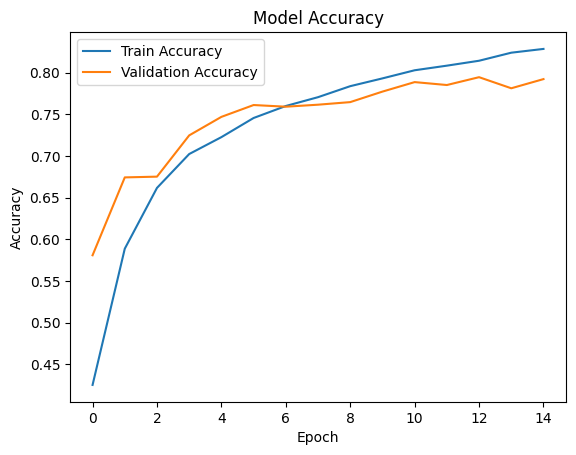

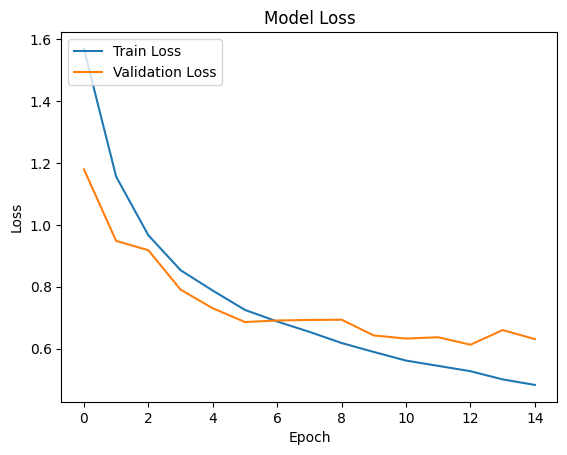

In [6]:
#Cell 6: Evaluate the Model and Plot Performance
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot, verbose=2)
print('\nTest accuracy:', test_acc)
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()